In [3]:
import pandas as pd
import numpy as np
from functools import partial, reduce
from numpy import genfromtxt
from scipy import stats
from scipy.spatial.distance import cdist, euclidean
import itertools
from itertools import groupby
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [4]:
Diabetes = pd.read_sas('DIQ_J.XPT')
#variables needed diabetic DIQ010, taking insulin DIQ050, 
Diabetes=Diabetes[["SEQN","DIQ010","DIQ050"]]
Diabetes.columns=(['SEQN','Are_You_Diabetic?','Taking_insulin?'])


In [5]:
Demographics = pd.read_sas('DEMO_J.XPT')
#variables needed Gender RIAGENDR,Marital status DMDMARTL,income INDHHIN2,race RIDRETH1
Demographics=Demographics[["SEQN","RIDAGEYR","RIAGENDR","DMDMARTL","INDHHIN2","RIDRETH3"]]
Demographics.columns=(["SEQN","Age","Gender","Marital_status","Income","Race"])


In [6]:
Insulin=pd.read_sas('INS_J.XPT')
#insulin amount LBXIN,
Insulin=Insulin[["SEQN",'LBXIN']]
Insulin.columns=(["SEQN",'insulin_Amount'])


In [7]:
Body_measure = pd.read_sas('BMX_J.XPT')
#variables needed weight BMXWT,BMI is BMXBMI,waist circumference BMXWAIST
Body_measure=Body_measure[["SEQN","BMXWT","BMXBMI","BMXWAIST"]]
Body_measure.columns=(["SEQN",'Weight','BMI','Waist_Circumference'])


In [8]:
Blood_pressure = pd.read_sas('BPX_J.XPT')
#variables systolic BPXSY1, diastolic BPXDI1
Blood_pressure=Blood_pressure[["SEQN","BPXSY1","BPXDI1"]]
Blood_pressure.columns=(["SEQN","Systolic","Diastolic"])


In [9]:
Health_coverage=pd.read_sas('HIQ_J.XPT')
#have health care coverage HIQ011, precribtion plan HIQ270
Health_coverage=Health_coverage[["SEQN","HIQ011","HIQ270"]]
Health_coverage.columns=(["SEQN","Health_Coverage","Precription_Plan"])


In [10]:
data=[Diabetes,Demographics,Body_measure,Blood_pressure,Health_coverage]
merge = partial(pd.merge, on=['SEQN'], how='inner')
data=reduce(merge, data)
#we have a total of 8366 matching dataset
data.shape
data['Weight']*=2.2 
data

,SEQN,Are_You_Diabetic?,Taking_insulin?,Age,Gender,Marital_status,Income,Race,Weight,BMI,Waist_Circumference,Systolic,Diastolic,Health_Coverage,Precription_Plan
0,93703.0,2.0,2.0,2.0,2.0,NaN,15.0,6.0,30.14,17.5,48.2,NaN,NaN,1.0,1.0
1,93704.0,2.0,2.0,2.0,1.0,NaN,15.0,3.0,30.58,15.7,50.0,NaN,NaN,1.0,1.0
2,93705.0,2.0,2.0,66.0,2.0,3.0,3.0,4.0,174.90,31.7,101.8,NaN,NaN,1.0,1.0
3,93706.0,2.0,2.0,18.0,1.0,NaN,NaN,6.0,145.86,21.5,79.3,112.0,74.0,1.0,1.0
4,93707.0,2.0,2.0,13.0,1.0,NaN,10.0,7.0,99.88,18.1,64.1,128.0,38.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8361,102952.0,3.0,2.0,70.0,2.0,1.0,4.0,6.0,107.80,20.0,82.2,136.0,74.0,1.0,1.0
8362,102953.0,2.0,2.0,42.0,1.0,4.0,12.0,1.0,214.28,35.8,114.8,124.0,76.0,1.0,1.0
8363,102954.0,2.0,2.0,41.0,2.0,5.0,10.0,4.0,152.02,26.1,86.4,116.0,66.0,1.0,1.0
8364,102955.0,2.0,2.0,14.0,2.0,NaN,9.0,4.0,246.18,45.6,113.5,114.0,62.0,1.0,1.0


In [11]:
Insulindata=[Diabetes,Demographics,Insulin,Body_measure,Blood_pressure,Health_coverage]
merge = partial(pd.merge, on=['SEQN'], how='inner')
Insulindata=reduce(merge, Insulindata)
#we have a total of 8366 matching dataset
Insulindata.shape
Insulindata['Weight']*=2.2 



In [12]:
#Analyzing the Are you Diabetic column
# 1= diabetic
# 2= Nondiabetic
# 3= Borderline diabetic
# 9= Don't know
data.shape
data.iloc[:,1].value_counts()

2.0    7334
1.0     853
3.0     175
9.0       4
Name: Are_You_Diabetic?, dtype: int64

In [13]:
#Analyzing the Are you Diabetic column
# 1= diabetic
# 2= Nondiabetic
# 3= Borderline diabetic
# 9= Don't know
pd.options.display.float_format = '{:.1f}'.format
WeightBMI_data=data[['Are_You_Diabetic?','Weight','BMI',"Waist_Circumference"]]
WeightBMI_data.replace(0, np.nan, inplace=True)
WeightBMI_data=WeightBMI_data.groupby('Are_You_Diabetic?')[['Weight','BMI',"Waist_Circumference"]].mean()
WeightBMI_data

C:\Users\anboy\anaconda3\envs\name_of_new_environment\lib\site-packages\pandas\core\frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,Weight,BMI,Waist_Circumference
Are_You_Diabetic?,,,
1.0,196.0,32.2,109.2
2.0,142.0,25.8,87.3
3.0,190.8,31.5,104.0
9.0,162.4,29.2,98.1


In [14]:
#How does Race effect diabetes
#Select Are you diabetic,Systole and BMI(call it cardiodata)
Racedata=data[["Race",'Weight','BMI',"Waist_Circumference"]]
Racedata.replace(0, np.nan, inplace=True)
#pd.options.display.float_format = '{:.0f}'.format
Racedata.groupby("Race")[['Weight','BMI',"Waist_Circumference"]].mean()
# 1= Mexican American
# 2= Other Hispanic
# 3= White American
# 4= Black American
# 6= Asian American
# 7= Other Race - Including Multi-Racial

C:\Users\anboy\anaconda3\envs\name_of_new_environment\lib\site-packages\pandas\core\frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,Weight,BMI,Waist_Circumference
Race,,,
1.0,145.7,27.1,90.7
2.0,144.9,26.8,90.2
3.0,152.0,26.7,92.0
4.0,158.4,27.6,90.6
6.0,132.8,24.1,84.4
7.0,138.3,25.4,85.8


In [15]:
import pandas as pd
d = pd.read_csv("Income.csv")
d=d[["Code or Value","Value Description"]]
d=d.transpose()
d

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Code or Value,1,2,3,4,5,6,7,8,9,10,12,13,14,15,77,99,.
Value Description,"$ 0 to $ 4,999","$ 5,000 to $ 9,999","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $34,999","$35,000 to $44,999","$45,000 to $54,999","$55,000 to $64,999","$65,000 to $74,999","$20,000 and Over","Under $20,000","$75,000 to $99,999","$100,000 and Over",Refused,Don't know,Missing


In [16]:
#How does Income effect diabetes
#Select Are you diabetic,Systole and BMI(call it cardiodata)
Incomedata=data[["Income","Systolic","BMI"]]
Incomedata.replace(0, np.nan, inplace=True)
#pd.options.display.float_format = '{:.0f}'.format
Incomedata=Incomedata.groupby("Income")[["Systolic","BMI",]].mean()
Incomedata=Incomedata.transpose()
Incomedata
# 1= Mexican American
# 2= Other Hispanic
# 3= White American
# 4= Black American
# 5= Other Race - Including Multi-Racial

C:\Users\anboy\anaconda3\envs\name_of_new_environment\lib\site-packages\pandas\core\frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Income,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,12.0,13.0,14.0,15.0,77.0,99.0
Systolic,120.7,124.1,126.6,123.7,122.9,122.7,122.3,121.1,120.8,120.1,122.7,119.7,118.2,118.6,122.5,122.5
BMI,25.6,27.2,26.7,26.3,26.5,27.2,27.2,27.2,26.9,26.4,26.3,27.5,26.2,25.4,28.5,27.0


In [17]:
#How does been diabetic after the cardiovascular system
#Select Are you diabetic,Systole and diastole (call it cardiodata)
cardiodata=data[["Are_You_Diabetic?","Systolic","Diastolic"]]
cardiodata.replace(0, np.nan, inplace=True)
#pd.options.display.float_format = '{:.0f}'.format
cardiodata.groupby('Are_You_Diabetic?')[["Systolic","Diastolic"]].mean()
# 1= diabetic
# 2= Nondiabetic
# 3= Borderline diabetic
# 9= Don't know

C:\Users\anboy\anaconda3\envs\name_of_new_environment\lib\site-packages\pandas\core\frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,Systolic,Diastolic
Are_You_Diabetic?,,
1.0,133.0,70.0
2.0,119.5,67.4
3.0,130.8,71.8
9.0,114.0,67.0


In [308]:
# regression of log systolic blood pressure against log body mass index at baseline in men and women 
# create new variables

logSystolic = data['Systolic'].apply(np.log).rename('logSystolic')
logDiastolic = data['Diastolic'].apply(np.log).rename('logDiastolic')
logBMI = data['BMI'].apply(np.log).rename('logBMI')



In [328]:
# add the new variables into the dataframe as new column
L = [logSystolic, logDiastolic,logBMI, data]
h2 = pd.concat(L, axis=1)

# select entries accordng to a condition just for males
h3 = h2[h2['Gender'] ==1.0 ]
h3




,logSystolic,logDiastolic,logBMI,SEQN,Are_You_Diabetic?,Taking_insulin?,Age,Gender,Marital_status,Income,Race,Weight,BMI,Waist_Circumference,Systolic,Diastolic,Health_Coverage,Precription_Plan
1,nan,nan,2.8,93704.0,2.0,2.0,2.0,1.0,nan,15.0,3.0,30.6,15.7,50.0,nan,nan,1.0,1.0
3,4.7,4.3,3.1,93706.0,2.0,2.0,18.0,1.0,nan,nan,5.0,145.9,21.5,79.3,112.0,74.0,1.0,1.0
4,4.9,3.6,2.9,93707.0,2.0,2.0,13.0,1.0,nan,10.0,5.0,99.9,18.1,64.1,128.0,38.0,1.0,1.0
7,4.7,4.2,3.1,93711.0,2.0,2.0,56.0,1.0,1.0,15.0,5.0,136.6,21.3,86.6,108.0,68.0,1.0,1.0
8,4.7,4.2,3.0,93712.0,2.0,2.0,18.0,1.0,nan,4.0,1.0,129.6,19.7,72.0,112.0,68.0,2.0,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8357,5.1,4.4,3.2,102947.0,2.0,2.0,75.0,1.0,3.0,8.0,4.0,161.0,25.2,94.0,160.0,82.0,1.0,2.0
8359,4.8,4.3,3.2,102949.0,2.0,2.0,33.0,1.0,6.0,6.0,3.0,169.2,23.7,85.5,120.0,72.0,1.0,1.0
8360,nan,nan,3.0,102951.0,2.0,2.0,4.0,1.0,nan,10.0,3.0,52.4,20.1,62.2,nan,nan,1.0,1.0
8362,4.8,4.3,3.6,102953.0,2.0,2.0,42.0,1.0,4.0,12.0,1.0,214.3,35.8,114.8,124.0,76.0,1.0,1.0



model: log(BMI) = a + b*Age
                            OLS Regression Results                            
Dep. Variable:                 logBMI   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     1593.
Date:                Mon, 26 Apr 2021   Prob (F-statistic):          2.42e-292
Time:                        15:04:45   Log-Likelihood:                -39.955
No. Observations:                3897   AIC:                             83.91
Df Residuals:                    3895   BIC:                             96.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9897  

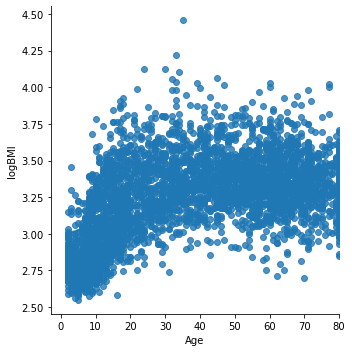

In [329]:
# build a model on the selected data
from statsmodels.formula.api import ols


model = ols("logBMI ~ Age", h3).fit()
print("\nmodel: log(BMI) = a + b*Age")
print(model.summary())
sns.lmplot(y='logBMI', x='Age', data=h3)



In [400]:
#Multiple Linear Regression
Linear_data= data[["Age","Gender","Weight","BMI","Waist_Circumference","Systolic","Diastolic","Income","Health_Coverage"]]


In [401]:
#Multiple Linear Regression
Linear_data=Insulindata[["Age","Gender","Weight","BMI","insulin_Amount","Waist_Circumference","Income","Systolic","Diastolic"]]
Linear_data
# preprare variables
logWeight = Linear_data['Weight'].apply(np.log).rename('logWeight')
logBMI =Linear_data['BMI'].apply(np.log).rename('logBMI')
logSystolic = Linear_data['Systolic'].apply(np.log).rename('logSystolic')
logDiastolic = Linear_data['Diastolic'].apply(np.log).rename('logDiastolic')
logWaist_Circumference = Linear_data['Waist_Circumference'].apply(np.log).rename('Waist_Circumference')
loginsulin_Amount = Linear_data['insulin_Amount'].apply(np.log).rename('insulin_Amount')
logIncome = Linear_data['Income'].apply(np.log).rename('Income')
woman = (Linear_data['Gender']-1).rename("woman")
wo_lBMI = (woman * logBMI).rename('wo_lBMI')
wo_Age = (woman * Linear_data['Age']).rename('wo_Age')
# add the new variables into the dataframe as new columns
L = [logWeight, logBMI, logSystolic, logDiastolic, logWaist_Circumference, loginsulin_Amount, woman,wo_lBMI,wo_Age,logIncome, Linear_data]
h2 = pd.concat(L, axis=1)
h2


,logWeight,logBMI,logSystolic,logDiastolic,Waist_Circumference,insulin_Amount,woman,wo_lBMI,wo_Age,Income,Age,Gender,Weight,BMI,insulin_Amount,Waist_Circumference,Income,Systolic,Diastolic
0,4.8,3.2,nan,nan,4.5,2.3,1.0,3.2,66.0,1.8,66.0,2.0,117.7,23.7,9.7,88.2,6.0,nan,nan
1,4.9,3.1,4.7,4.2,4.5,1.7,0.0,0.0,0.0,2.7,56.0,1.0,136.6,21.3,5.3,86.6,15.0,108.0,68.0
2,5.1,3.2,4.8,4.1,4.5,1.4,0.0,0.0,0.0,nan,22.0,1.0,163.7,24.5,3.9,86.2,nan,116.0,62.0
3,4.8,3.1,4.9,4.5,4.4,1.6,0.0,0.0,0.0,2.3,45.0,1.0,119.7,22.0,4.9,77.5,10.0,128.0,88.0
4,5.0,3.3,4.6,4.1,4.5,2.4,1.0,3.3,13.0,2.6,13.0,2.0,147.4,26.0,10.9,86.0,14.0,102.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3031,5.1,3.2,5.1,4.4,4.5,-0.3,0.0,0.0,0.0,2.1,75.0,1.0,161.0,25.2,0.7,94.0,8.0,160.0,82.0
3032,4.8,3.0,4.5,4.2,4.2,1.7,1.0,3.0,31.0,2.7,31.0,2.0,116.4,20.2,5.4,69.7,15.0,88.0,64.0
3033,4.7,3.0,4.9,4.3,4.4,1.5,1.0,3.0,70.0,1.4,70.0,2.0,107.8,20.0,4.4,82.2,4.0,136.0,74.0
3034,5.0,3.3,4.8,4.2,4.5,2.3,1.0,3.3,41.0,2.3,41.0,2.0,152.0,26.1,9.5,86.4,10.0,116.0,66.0


In [402]:
model = ols('loginsulin_Amount ~ logWeight + logBMI + logSystolic + logDiastolic + logWaist_Circumference +logIncome+ woman + wo_lBMI +wo_Age', h2).fit()
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:      loginsulin_Amount   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     118.3
Date:                Mon, 26 Apr 2021   Prob (F-statistic):          5.23e-183
Time:                        17:50:25   Log-Likelihood:                -2197.8
No. Observations:                2320   AIC:                             4416.
Df Residuals:                    2310   BIC:                             4473.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -5

In [403]:
model = ols('loginsulin_Amount ~ logWeight + logBMI  + logDiastolic + logWaist_Circumference + woman + wo_lBMI +wo_Age', h2).fit()
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:      loginsulin_Amount   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     157.3
Date:                Mon, 26 Apr 2021   Prob (F-statistic):          9.95e-192
Time:                        17:50:28   Log-Likelihood:                -2299.4
No. Observations:                2418   AIC:                             4615.
Df Residuals:                    2410   BIC:                             4661.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -5